In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [3]:
Airlines = pd.read_csv("E:/DataScience/Assignments/Clustering/EastWestAirlines.csv")

In [4]:
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
df_Airlines = norm_func(Airlines.iloc[:,1:])
df_Airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [8]:
cluster=KMeans(n_clusters=8)
cluster.fit(df_Airlines)
cluster.labels_

array([6, 6, 6, ..., 5, 2, 2])

In [10]:
c = list(range(2,8))
c
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in c:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_Airlines)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_Airlines.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_Airlines.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
TWSS

[array([1657.66572161]),
 array([1392.12408309]),
 array([1170.237473]),
 array([1002.45329086]),
 array([953.5500114]),
 array([907.38540997])]

([<matplotlib.axis.XTick at 0x230f94ff7c0>,
 <a list of 6 Text major ticklabel objects>)

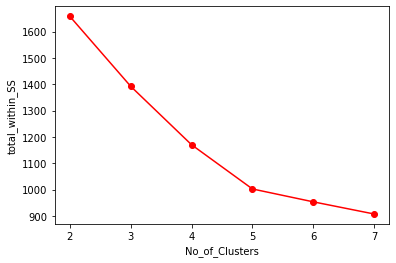

In [11]:
plt.plot(c,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("Total_within_SS");plt.xticks(c)